<h2><center>THE CHINESE UNIVERSITY OF HONG KONG<br /> 
    Department of Mathematics<br />
 MATH4280<br />
    Innovation and Design in Big Data Analytics</center></h2>

# LAB ASSIGNMENT ACTIVITY 5

# Question 1

Try to denoise the following image by implementing a blur with Robust PCA.

The image (e9gla.png) is blurred by some random points. This question is asking you to remove the noise by Robust PCA. 


Text(0.5, 1.0, 'Original image')

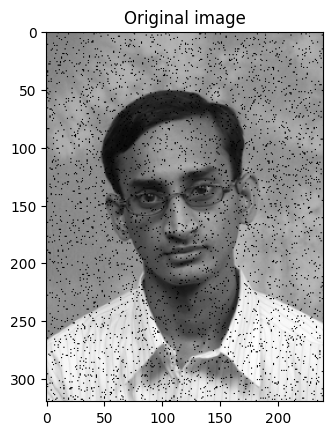

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import fftpack
from scipy.fft import fft2,ifft2,fftshift,ifftshift
from r_pca import *

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

    
    
im = plt.imread('e9gla.png').astype(float)

n1, n2 = im.shape
S = np.random.rand(n1, n2)
im[S < 0.05] = 0


plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

iteration: 1, error: 0.10054876756416159
iteration: 100, error: 0.0003293774176727392
iteration: 200, error: 0.0020107126821421366
iteration: 300, error: 0.0014893429738346705
iteration: 400, error: 0.001691316010946835
iteration: 500, error: 0.0015570006661906968
iteration: 600, error: 0.0008060666230030319
iteration: 700, error: 0.0002681787426136233
iteration: 800, error: 0.00012010056092769944
iteration: 900, error: 6.055706884472898e-05
iteration: 1000, error: 3.7759207909625384e-05
iteration: 1100, error: 2.5647899881531664e-05
iteration: 1200, error: 2.0306688846770252e-05
iteration: 1234, error: 1.6103253687341992e-05


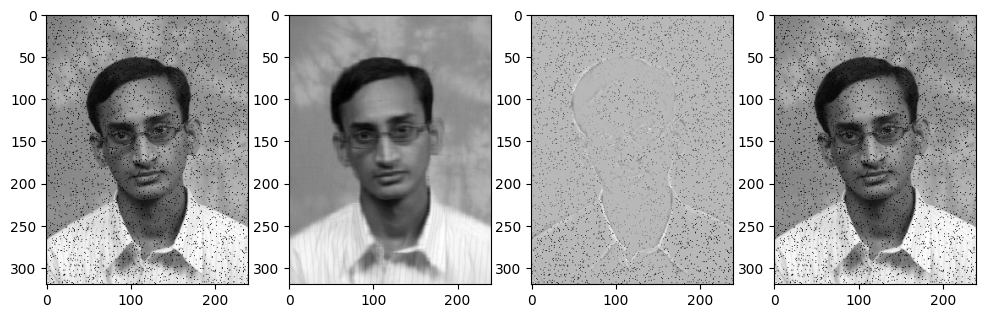

In [17]:
## answer 1a

D = im.copy()

rpca = R_pca(D)
L, S = rpca.fit(max_iter=10000, iter_print=100)
# after 

plt.figure(figsize=(12,7))
plt.subplot(1,4,1)
imgA = D
plt.imshow(imgA,plt.cm.gray)
plt.clim(np.min(imgA),np.max(imgA)) # set color limits for the image

plt.subplot(1,4,2)
imgB = L
plt.imshow(imgB,plt.cm.gray)
plt.clim(np.min(imgB),np.max(imgB))

plt.subplot(1,4,3)
imgC = S
plt.imshow(imgC,plt.cm.gray)
plt.clim(np.min(imgC),np.max(imgC))

plt.subplot(1,4,4)
imgD = S + L
plt.imshow(imgD,plt.cm.gray)
plt.clim(np.min(imgD),np.max(imgD))


# Question 2

In this question, we will create an artificial sound wave, sample 10% of it. This question is asking you to reconstruct the original signal from the sample of 10%. This is one dimensional compressed sensing.




In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import scipy.misc
import cvxpy as cvx

In [2]:
# sum of two sinusoids
n = 5000
t = np.linspace(0, 1/8, n)
y = np.sin(1000 * np.pi * t) + np.sin((2000+t*1000) * np.pi * t)
yt = spfft.dct(y, norm='ortho')

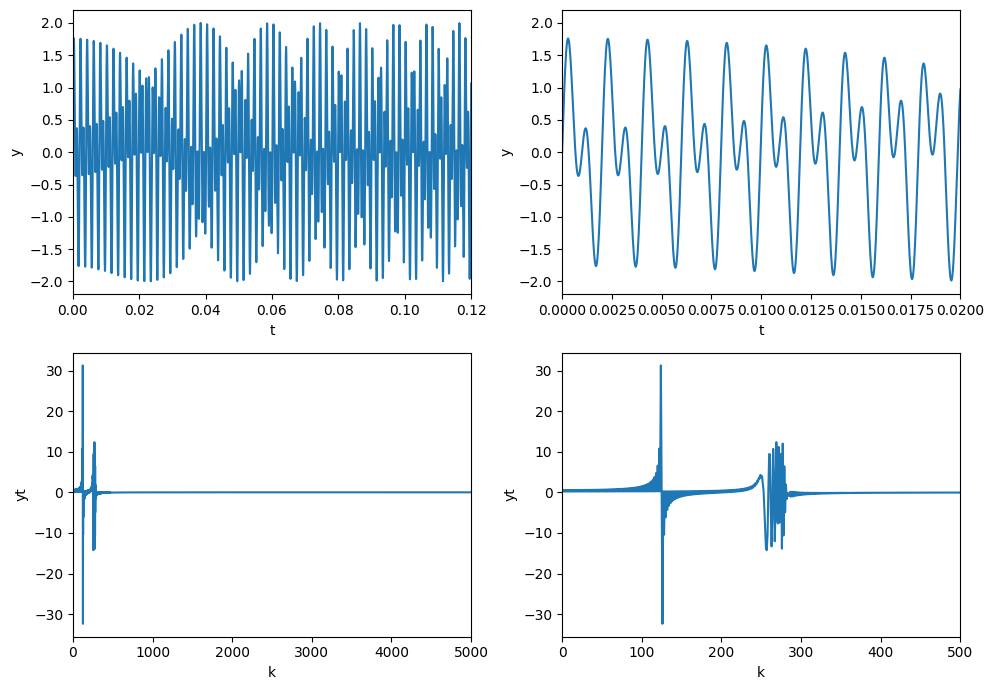

In [3]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
plt.plot(t,y)
plt.xlim(0,0.12)
plt.xlabel('t')
plt.ylabel('y')

plt.subplot(2,2,2)
plt.plot(t,y)
plt.xlim(0,0.02)
plt.xlabel('t')
plt.ylabel('y')

k=np.linspace(0, n-1, n)
plt.subplot(2,2,3)
plt.plot(k,yt)
plt.xlim(0,5000)
plt.xlabel('k')
plt.ylabel('yt')

plt.subplot(2,2,4)
plt.plot(k,yt)
plt.xlim(0,500)
plt.xlabel('k')
plt.ylabel('yt')

plt.tight_layout()
plt.show()

Here is the 10% sample of signal.

In [4]:
# extract small sample of signal
m = 500 # 10% sample (500 = 10% of 5000 )
ri = np.random.choice(n, m, replace=False) # random sample of indices
ri.sort() # sorting not strictly necessary, but convenient for plotting
t2 = t[ri]
y2 = y[ri]

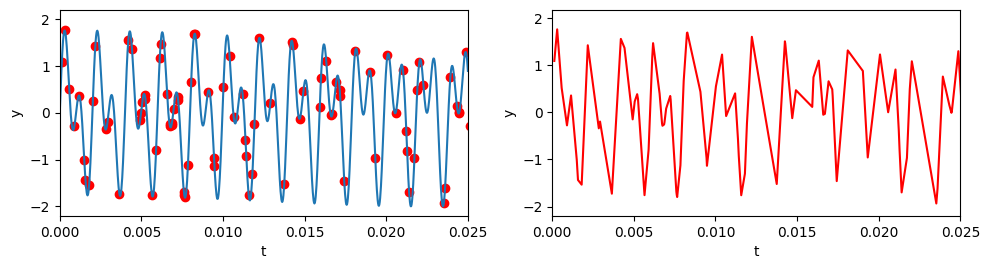

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.plot(t,y)
plt.scatter(t2,y2,color='r')
plt.xlim(0,0.025)
plt.xlabel('t')
plt.ylabel('y')

plt.subplot(2,2,2)
plt.plot(t2,y2,'r')
plt.xlim(0,0.025)
plt.xlabel('t')
plt.ylabel('y')

plt.tight_layout()
plt.show()

Reconstruct the original signal from the sample of 10% and plot the graph of the result for the range $t=0$ to $t=0.025$

In [6]:
## answer 2
A = spfft.idct(np.identity(n), norm='ortho', axis=0) #discrete cosine transform
A = A[ri]
# Solve the L1 optimization problem to reconstruct the signal
# using L1 regularization
yt_reconstructed = cvx.Variable(n)
objective = cvx.Minimize(cvx.norm(yt_reconstructed, 1))
constraints = [A*yt_reconstructed == y2]
prob = cvx.Problem(objective, constraints)
result = prob.solve()



c:\Users\kinla\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


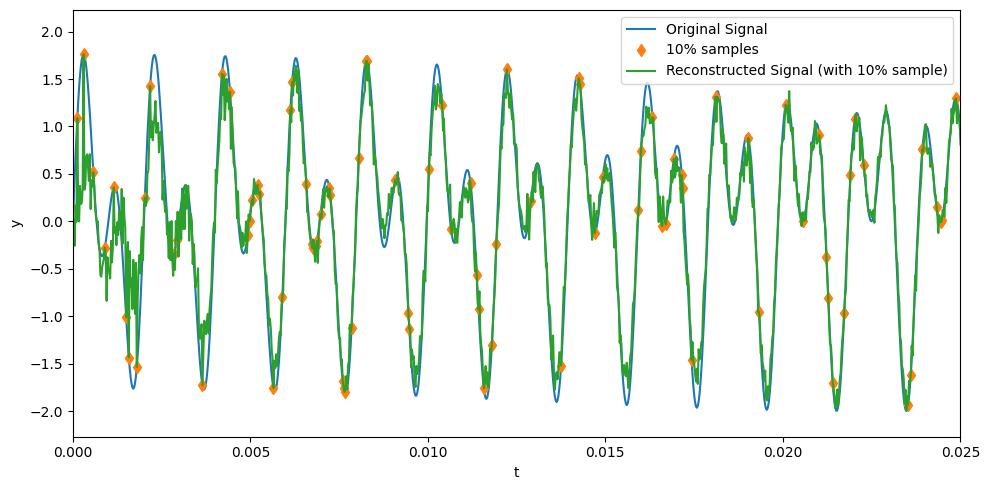

In [12]:
# Reconstructed signal in frequency domain
sig = spfft.idct(yt_reconstructed.value, norm='ortho')

# Plot the reconstructed signal
plt.figure(figsize=(10,5))
plt.plot(t, y, label='Original Signal')
plt.plot(t[ri], y[ri], 'd', label='10% samples')
plt.plot(t, sig, label='Reconstructed Signal (with 10% sample)')
plt.xlim(0, 0.025)
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()


## Question 3

In this question, we are going to perform Sparse Representation of Classification (SRC)


In [ ]:
!pip install pywavelets

^C


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\kinla\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\kinla\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\kinla\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\kinla\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\kinla\AppData\Local\Programs\Python\Python310\lib\http\client.py", line 464, in read
    s = self.fp.read(amt)
  File "C:\Users\kinla\AppData\Local\Programs\Python\Python310\lib\socket.py", line 705, in readint

     ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
      --------------------------------------- 0.1/4.2 MB 465.5 kB/s eta 0:00:09
      --------------------------------------- 0.1/4.2 MB 558.5 kB/s eta 0:00:08
      --------------------------------------- 0.1/4.2 MB 558.5 kB/s eta 0:00:08
      --------------------------------------- 0.1/4.2 MB 327.7 kB/s eta 0:00:13
      --------------------------------------- 0.1/4.2 MB 327.7 kB/s eta 0:00:13
      --------------------------------------- 0.1/4.2 MB 327.7 kB/s eta 0:00:13
     - -------------------------------------- 0.1/4.2 MB 261.9 kB/s eta 0:00:16
     - -------------------------------------- 0.1/4.2 MB 261.9 kB/s eta 0:00:16
     - -------------------------------------- 0.1/4.2 MB 261.9 kB/s eta 0:00

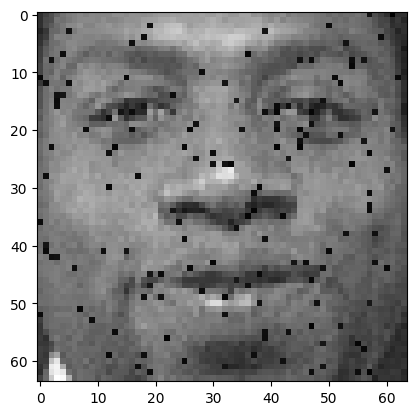

In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import cvxpy as cp
import pandas as pd

df = pd.read_csv('face_data.csv')

images = df.iloc[:,:-1] # take columns of data except the last column
types = df.iloc[:,-1] # only taking the last column

np.random.seed(1234)
corrupted_img = images.iloc[218].values.reshape(64,64)
for _ in range(150):
    corrupted_img[np.random.randint(63),np.random.randint(63)]=0 # plotting black dots on those location.
corrupted_img += np.random.randn(64,64)* 1e-1 * 0.2



plt.imshow(corrupted_img,plt.cm.gray)
plt.show()

In [2]:
print(df.head)

<bound method NDFrame.head of             0         1         2         3         4         5         6  \
0    0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1    0.454545  0.471074  0.512397  0.557851  0.595041  0.640496  0.681818   
2    0.318182  0.400826  0.491736  0.528926  0.586777  0.657025  0.681818   
3    0.198347  0.194215  0.194215  0.194215  0.190083  0.190083  0.243802   
4    0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.400826  0.495868  0.570248  0.632231  0.648760  0.640496  0.661157   
396  0.367769  0.367769  0.351240  0.301653  0.247934  0.247934  0.367769   
397  0.500000  0.533058  0.607438  0.628099  0.657025  0.632231  0.657025   
398  0.214876  0.219008  0.219008  0.223140  0.210744  0.202479  0.276859   
399  0.516529  0.462810  0.280992  0.252066  0.247934  0.367769  0.574380   

            7         8         9  ...      4

You are given two dataframes `images` and `types`.

`images` is a $400\times 4096$ dataframe, with each row containing the pixel value of a $64 \times 64$-pixel image.

`types` is a $400\times 1$ dataframe assigning a class number to the picture of the corresponding row. 

We now have a corrupted $64\times 64$-pixel image `corrupted_img` and we would like to classify it using sparse representation with discrete wavelet transform. 

## Q3a

We will first build an overcomplete library $\Theta$.

$\Theta$ is a 2D matrix with each column being a flattened face data that we have. However, this would make $\Theta$ to be of size $4096\times 400$, which is overdetermined. 

To use compressed sensing, we need $\Theta$ to be underdetermined, so we downsample each image from $64\times 64$ to $16\times 16$ using discrete wavelet transform. As a result, $\Theta$ is a $256 \times 400$ matrix.

Create this $\Theta$ as `Theta`. 

Also note that you should normalize each column vector in $\Theta$. (e.g. via l2 norm)

Hints: You should use `pywt.wavedec2` with 2 levels.

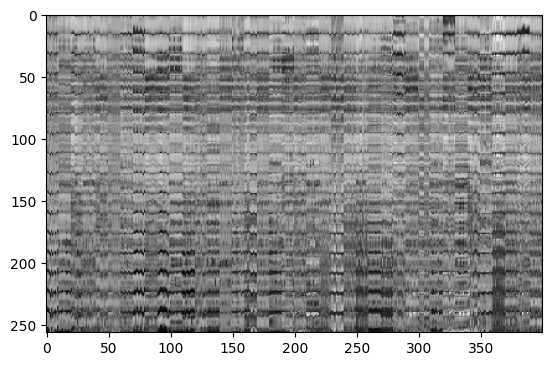

In [3]:
## answer 3a

import numpy as np
import pywt

# Define the number of levels for wavelet decomposition
num_levels = 2

# Initialize an empty list to store the columns of Theta
Theta_columns = []

# Iterate through each image in the images dataframe
for idx, row in images.iterrows():
    # idx: the index of the current row
    # row: the data of the current row
    
    # Reshape the image to 64x64 to make it ready to be transform.
    image = row.values.reshape(64, 64)
    
    # Perform 2-level discrete wavelet transform
    coeffs = pywt.wavedec2(image, 'haar', level=num_levels)
    
    # Extract the approximation coefficients at the highest level
    cA2 = coeffs[0] # wavelet transform split the images into 4 pieces. 
    # The first portion is the most useful. 
    
    # Flatten the coefficients and append them to Theta_columns
    flattened_coeffs = cA2.flatten() # flattening means converting a multi-dimensional array into a 1D array
    Theta_columns.append(flattened_coeffs)

# Stack the flattened coefficients to form the matrix Theta
# We stacked images column by column. Now we flip the matrix, so that each column is an image again.
Theta = np.vstack(Theta_columns).T

# Normalize each column vector in Theta using L2 norm
Theta_normalized = Theta / np.linalg.norm(Theta, axis=0) # default ord = 2, so this is L2 norm
# for consistency, I should write: np.linalg.norm(Theta, ord = 2, axis=0)

# Originally, we had 4096 x 400, where 4096 is pixel of each image, 400 is number of images

# Theta_normalized is now a 256x400 matrix. 256 indicating the size of the downsized image

plt.imshow(Theta_normalized,plt.cm.gray)
plt.show()

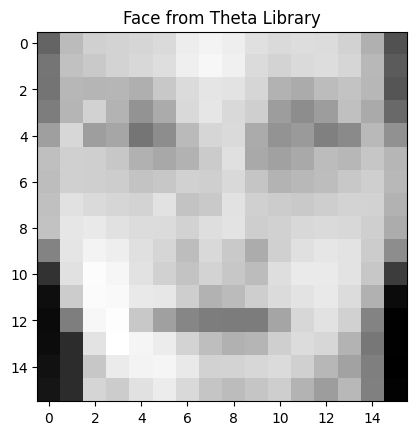

In [7]:
# Choose an index to visualize a face from Theta library
face_index = 0

# Reshape the selected face from Theta_normalized to 16x16
selected_face = Theta_normalized[:, face_index].reshape(16, 16)

# Display the selected face
plt.imshow(selected_face, cmap='gray')
plt.title('Face from Theta Library')
plt.show()

## Q3b

Our corrupted image should correspond to one of the classes in the dataset. After appropriately downsampled to match the columns of $\Theta$, this downsampled image can be sparsely representated as a sum of the columns of $\Theta$ using `cvxpy`.

Recall the formulation of sparse representation:
$$\begin{align*}&\min \|s\|_1 \\
\text{subject to   }&\Theta s = X,\end{align*}$$
where $s$ is the vector of the sparse coefficients and
$X$ is the data.

Using this method and looking at the coefficient vector $s$, which class does our corrupted image belong to?

In [12]:
## answer 3b

import cvxpy as cvx

corrupted_img_copy = corrupted_img.copy()
# Iterate through each image in the images dataframe

def downsize_img(image, num_levels=2):
    # Perform 2-level discrete wavelet transform
    coeffs = pywt.wavedec2(image, 'haar', level=2)
    
    # Extract the approximation coefficients at the highest level
    downsized_image = coeffs[0]
    
    return downsized_image
    
downsize_corrputed_img= downsize_img(corrupted_img_copy)


# do L1 optimization - below is constructing a convex optimization problem: 
vx = cvx.Variable(Theta_normalized.shape[1])
# vx representing an n-dimensional vecor that the optimization problem will solve for
objective = cvx.Minimize(cvx.norm(vx, 1))
# cvx.norm(vx, 1) is the L1 norm of vx.
constraints = [Theta_normalized*vx == downsize_corrputed_img.flatten()] 

prob = cvx.Problem(objective, constraints)

result = prob.solve(verbose=True)

# Solve the problem
prob.solve()

# Get the sparse coefficient vector
sparse_coeffs = vx.value

# Find the index of the non-zero coefficient
class_index = np.argmax(sparse_coeffs)

# Get the corresponding class label
corrupted_image_class = types[class_index]

print("Corrupted image belongs to class:", corrupted_image_class)

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Oct 06 12:56:39 PM: Your problem has 400 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 06 12:56:39 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 06 12:56:39 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 06 12:56:39 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 06 12:56:39 PM: Compiling problem (target solver=ECOS).
(CVXPY) Oct 06 12:56:39 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -

c:\Users\kinla\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 4 times so far.

  warnings.warn(msg, UserWarning)


-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 06 12:56:40 PM: Problem status: optimal
(CVXPY) Oct 06 12:56:40 PM: Optimal value: 2.534e+01
(CVXPY) Oct 06 12:56:40 PM: Compilation took 1.357e-01 seconds
(CVXPY) Oct 06 12:56:40 PM: Solver (including time spent in interface) took 5.242e-01 seconds
Corrupted image belongs to class: 21


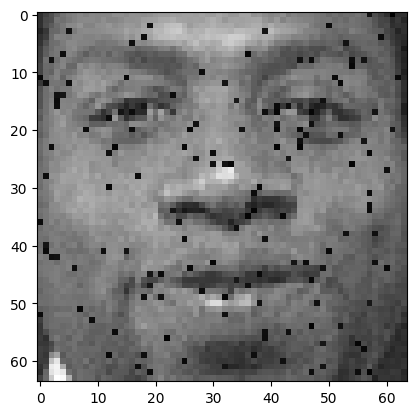

In [16]:
found_image = images.iloc[class_index].values.reshape(64,64)


plt.imshow(found_image,plt.cm.gray)
plt.show()

In [17]:
print(types)

0       0
1       0
2       0
3       0
4       0
       ..
395    39
396    39
397    39
398    39
399    39
Name: target, Length: 400, dtype: int64
